# Import dependencies

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Clean data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# EDA

In [5]:
#drop useless field
df = df.drop('country',axis = 1)

In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<AxesSubplot:>

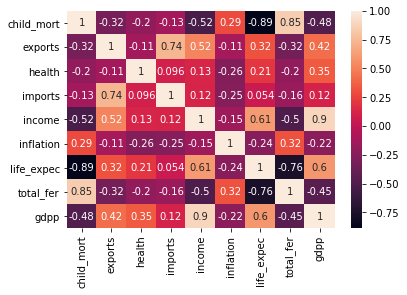

In [7]:
#correation
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True)

We see the strong correlation between:
1. gdpp vs income
2. child_mort vs life_expec
3. child_mort vs total_fer


# Scaling data

In [8]:
std = StandardScaler()
scaled = std.fit_transform(df)
df_scaled = pd.DataFrame(scaled, columns  = df.columns)

# Modelling

Add function to find N_clusters

In [9]:
def find_inertia(corr_field):
    inertia = []
    for k in range(1,10):
        kcul = KMeans(n_clusters=k)
        kmeans = kcul.fit(df[corr_field])
        inertia.append(kmeans.inertia_)

    fig, ax = plt.subplots()
    ax.plot(range(1,10),inertia, marker = '+',color = 'red' , ls = '--', markeredgecolor = 'blue', markersize = '10')

# gdpp vs income

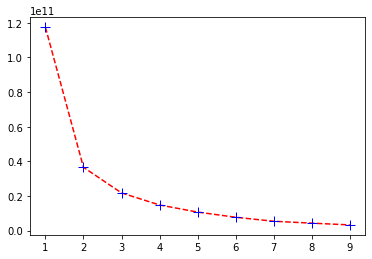

In [10]:
corr_field = ['gdpp','income']
find_inertia(corr_field)

use N_clusters = 3

In [11]:
Kcluster1 = KMeans(n_clusters = 3)
kmeans = Kcluster1.fit_predict(df_scaled[['gdpp','income']])
kmeans_df = pd.DataFrame(df)
kmeans_df['KMeans_Clusters'] = kmeans
kmeans_df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1


visualization

<AxesSubplot:xlabel='gdpp', ylabel='income'>

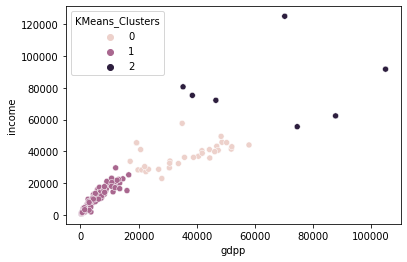

In [12]:
sns.scatterplot(x = 'gdpp' , y = 'income',data = kmeans_df,hue = 'KMeans_Clusters')

# child_mort vs life_expec

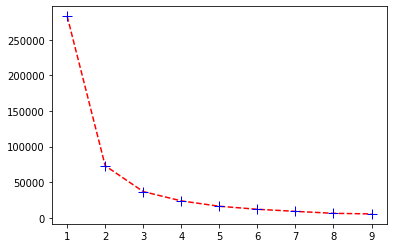

In [13]:
find_inertia(['child_mort','life_expec'])

use N_clusters = 3

<AxesSubplot:xlabel='child_mort', ylabel='life_expec'>

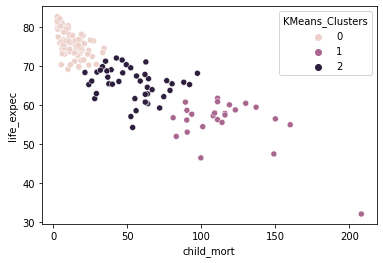

In [14]:
Kcluster = KMeans(n_clusters = 3)
kmeans = Kcluster.fit_predict(df_scaled[['child_mort','life_expec']])
kmeans_df = pd.DataFrame(df)
kmeans_df['KMeans_Clusters'] = kmeans
sns.scatterplot(x = 'child_mort' , y = 'life_expec' , data = kmeans_df , hue = 'KMeans_Clusters')

# child_mort vs total_fer

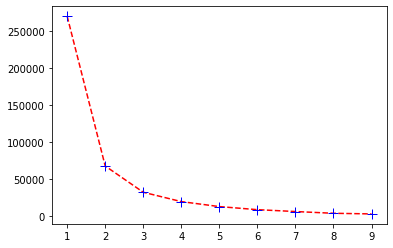

In [15]:
find = ['child_mort','total_fer']
find_inertia(find)

use N_clusters = 3

<AxesSubplot:xlabel='child_mort', ylabel='total_fer'>

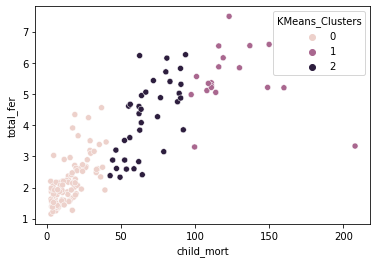

In [16]:
Kcluster = KMeans(n_clusters = 3)
Kmeans = Kcluster.fit_predict(df[find])
kmeans_df = pd.DataFrame(df)
kmeans_df['KMeans_Clusters'] = Kmeans
sns.scatterplot(x = 'child_mort' , y = 'total_fer' , data = kmeans_df,hue = 'KMeans_Clusters')